In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [12]:
tf.random.set_seed(42)

In [13]:
from tensorflow.keras.datasets import mnist

In [14]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [15]:
X_val = X_train[-1000:]
y_val = y_train[-1000:]

In [16]:
X_train = X_train[:-1000]
y_train = y_train[:-1000]

In [17]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Flatten

In [18]:
# Create the model
model_3 = tf.keras.Sequential([
  Input(shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  Flatten(),
  Dense(10, activation="relu"),
  Dense(10, activation="relu"),
  Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
history_3 = model_3.fit(X_train,
                        y_train,
                        epochs=20,
                        validation_data=(X_test, y_test))

Epoch 1/20
1844/1844 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3827 - loss: 1.7989 - val_accuracy: 0.4799 - val_loss: 1.2875
Epoch 2/20
1844/1844 ━━━━━━━━━━━━━━━━━━━━ 2s 958us/step - accuracy: 0.5573 - loss: 1.1122 - val_accuracy: 0.6077 - val_loss: 0.9948
Epoch 3/20
1844/1844 ━━━━━━━━━━━━━━━━━━━━ 2s 991us/step - accuracy: 0.6338 - loss: 0.9256 - val_accuracy: 0.6726 - val_loss: 0.8424
Epoch 4/20
1844/1844 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7252 - loss: 0.7652 - val_accuracy: 0.7634 - val_loss: 0.7208
Epoch 5/20
1844/1844 ━━━━━━━━━━━━━━━━━━━━ 2s 984us/step - accuracy: 0.7811 - loss: 0.6641 - val_accuracy: 0.8015 - val_loss: 0.6233
Epoch 6/20
1844/1844 ━━━━━━━━━━━━━━━━━━━━ 2s 958us/step - accuracy: 0.8370 - loss: 0.5607 - val_accuracy: 0.8559 - val_loss: 0.5192
Epoch 7/20
1844/1844 ━━━━━━━━━━━━━━━━━━━━ 2s 977us/step - accuracy: 0.8715 - loss: 0.4804 - val_accuracy: 0.8737 - val_loss: 0.4786
Epoch 8/20
1844/1844 ━━━━━━━━━━━━━━━━━━━━ 2s 965us/step - accuracy: 0.8805 - los

In [21]:
model_3.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,212 (94.58 KB)

 Trainable params: 8,070 (31.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,142 (63.06 KB)

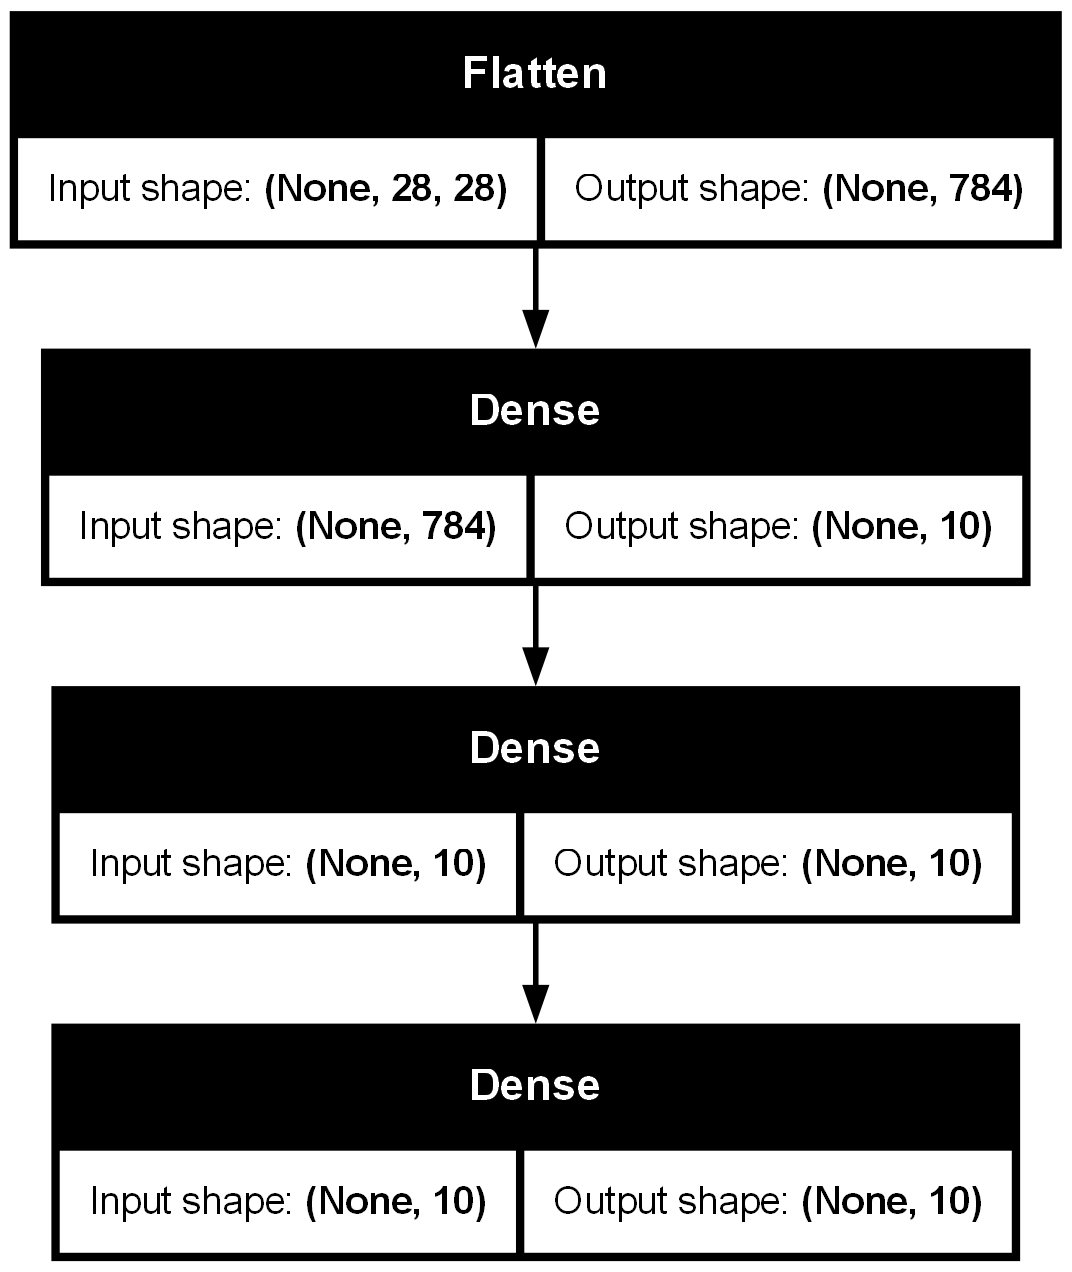

In [20]:
import os as os

os.environ["PATH"] += os.pathsep + r'C:/Program Files (x86)/Graphviz/bin/'

from tensorflow.keras.utils import plot_model
plot_model(model_2, show_shapes=True)

In [22]:
loss, accuracy = model_3.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.9181 - loss: 0.3130
Loss: 0.3130234479904175, Accuracy: 0.9180999994277954
